In [1]:
import os
#os.environ['R_HOME'] = '/home/h/hollenberg/miniconda3/envs/milopy-envv/lib/R' #path to your R installation
#os.environ['R_USER'] = '//home/h/hollenberg/miniconda3/envs/milopy-envv/lib/python3.11/site-packages/rpy2'
#home/h/hollenberg/miniconda3/envs/milopy-envv/bin/python
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
import sc_toolbox

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging
import milopy
import milopy.core as milo
import milopy.plot as milopl
import milopy.utils

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
5: Setting LC_PAPER failed, using "C" 
6: Setting LC_MEASUREMENT failed, using "C" 


In [2]:
sample_identifier = "batch" 
cell_type_identifier = "harmonized_anno" 
covariate_obs = "label"

In [3]:
# big adata containing whole information
adata = sc.read("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/complete_merged_public_and_galapagos_integrated_scvi_neighbors_umap.h5ad")

In [4]:
print(adata)
adata.obs

AnnData object with n_obs × n_vars = 535908 × 28090
    obs: 'author_annotation', 'manual_celltype_annotation', 'batch', 'condition', 'timepoint', 'dataset', 'fibrotic/control', 'coarse_harmonized_anno', 'Phase', 'SAMP_stage', 'SC_prep', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_group', 'harmonized_anno', 'n_genes', 'doublet_score', 'predicted_doublet', 'cell_type', 'label', 'augur_score', 'scanvi_leiden_1_0', 'scvi_leiden_1_0'
    uns: 'cell_type_colors', 'harmonized_anno_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'log1p_norm'
    obsp: 'connectivities', 'distances'


,author_annotation,manual_celltype_annotation,batch,condition,timepoint,dataset,fibrotic/control,coarse_harmonized_anno,Phase,SAMP_stage,...,celltypist_group,harmonized_anno,n_genes,doublet_score,predicted_doublet,cell_type,label,augur_score,scanvi_leiden_1_0,scvi_leiden_1_0
AAACCTGAGGACATTA-1_xie,Col13a1,Myofibroblasts,1_xie,untreated,NaN,xie,control,Myofibroblasts,NaN,NaN,...,Group3,Fibroblasts,1220,0.042383,False,Fibroblasts,control,0.797313,7,6
AAACCTGCAGTCGTGC-1_xie,Myofibroblasts,Peribronchial fibroblasts,1_xie,untreated,NaN,xie,control,Fibroblasts,NaN,NaN,...,Group2,Peribronchial fibroblasts,1184,0.016535,False,Peribronchial fibroblasts,control,0.843651,44,33
AAACCTGCATGAAGTA-1_xie,Lipofibroblasts,Alveolar macrophages,1_xie,untreated,NaN,xie,control,Alveolar macrophages,NaN,NaN,...,Group17,Alveolar macrophages,884,0.023217,False,Alveolar macrophages,control,0.749626,3,1
AAACCTGTCTCGCATC-1_xie,Myofibroblasts,Peribronchial fibroblasts,1_xie,untreated,NaN,xie,control,Fibroblasts,NaN,NaN,...,Group2,Peribronchial fibroblasts,679,0.021722,False,Peribronchial fibroblasts,control,0.843651,44,33
AAACGGGTCCTAGAAC-1_xie,Myofibroblasts,Peribronchial fibroblasts,1_xie,untreated,NaN,xie,control,Fibroblasts,NaN,NaN,...,Group2,Peribronchial fibroblasts,595,0.016535,False,Peribronchial fibroblasts,control,0.843651,44,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343066_galapagos_rad,NaN,Alveolar macrophages,74.0_galapagos_rad,radiation,NaN,galapagos_rad,fibrotic,NaN,S,19weeks,...,Group17,Alveolar macrophages,5055,0.047278,False,Alveolar macrophages,fibrotic,0.632834,35,29
343067_galapagos_rad,NaN,AT2,74.0_galapagos_rad,radiation,NaN,galapagos_rad,fibrotic,NaN,G1,19weeks,...,Group7,AT2,4969,0.131098,False,AT2,fibrotic,0.629297,47,14
343068_galapagos_rad,NaN,B-cells,74.0_galapagos_rad,radiation,NaN,galapagos_rad,fibrotic,NaN,G2M,19weeks,...,Group15,B-cells,812,0.014366,False,B-cells,fibrotic,0.530000,0,0
343069_galapagos_rad,NaN,B-cells,74.0_galapagos_rad,radiation,NaN,galapagos_rad,fibrotic,NaN,G2M,19weeks,...,Group15,B-cells,562,0.019910,False,B-cells,fibrotic,0.530000,0,0


In [5]:
d = 30
k = 50

sc.pp.neighbors(adata, n_neighbors=k, n_pcs=d)

In [6]:
milo.make_nhoods(adata, prop=0.1)
adata.obsm["nhoods"]
adata[adata.obs['nhood_ixs_refined'] != 0].obs[['nhood_ixs_refined', 'nhood_kth_distance']]

,nhood_ixs_refined,nhood_kth_distance
AACTCAGCAGGACCCT-1_xie,1,9.062037
AACTCAGTCCCACTTG-1_xie,1,9.876102
AAGGCAGGTGGTTTCA-1_xie,1,28.239197
ACATACGTCTTAGAGC-1_xie,1,59.966377
ACATCAGTCATACGGT-1_xie,1,9.435389
...,...,...
343041_galapagos_rad,1,7.935758
343043_galapagos_rad,1,3.631105
343055_galapagos_rad,1,49.028572
343065_galapagos_rad,1,4.883848


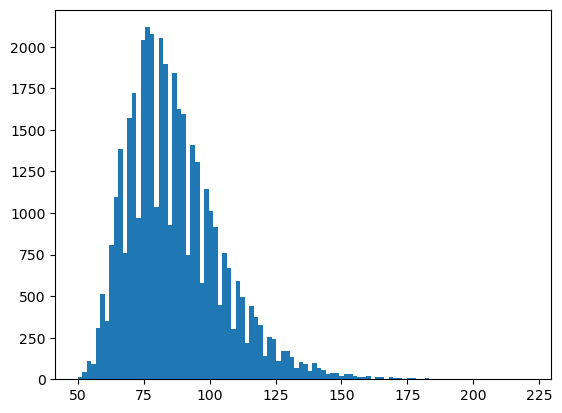

In [7]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100);

In [8]:
milo.count_nhoods(adata, sample_col=sample_identifier)
adata.uns["nhood_adata"]

AnnData object with n_obs × n_vars = 40806 × 166
    obs: 'index_cell', 'kth_distance'
    uns: 'sample_col'

In [9]:
adata.obs["condition_continuous"] = adata.obs[covariate_obs].astype('category').cat.codes
milo.DA_nhoods(adata, design="~condition_continuous")

In [10]:
adata.uns["nhood_adata"].obs

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,AACTCAGCAGGACCCT-1_xie,9.062037,0.221958,7.110076,0.402629,5.257345e-01,6.498779e-01,6.261246e-01
1,AACTCAGTCCCACTTG-1_xie,9.876102,0.279543,7.258543,0.613607,4.334330e-01,5.652318e-01,5.392135e-01
2,AAGGCAGGTGGTTTCA-1_xie,28.239197,0.065849,7.258063,0.031389,8.593753e-01,9.106357e-01,9.015350e-01
3,ACATACGTCTTAGAGC-1_xie,59.966377,-0.589720,7.208867,2.945094,8.613874e-02,1.602890e-01,1.450469e-01
4,ACATCAGTCATACGGT-1_xie,9.435389,0.033597,7.206278,0.008544,9.263552e-01,9.552300e-01,9.493187e-01
...,...,...,...,...,...,...,...,...
40801,343041_galapagos_rad,7.935758,1.232326,7.139468,12.788607,3.487392e-04,1.320343e-03,1.137586e-03
40802,343043_galapagos_rad,3.631105,1.587304,7.239718,19.026660,1.289067e-05,6.661628e-05,5.849899e-05
40803,343055_galapagos_rad,49.028572,0.022964,7.084263,0.004501,9.465110e-01,9.678091e-01,9.633662e-01
40804,343065_galapagos_rad,4.883848,2.078866,7.113625,35.825361,2.158311e-09,2.492135e-08,2.248048e-08


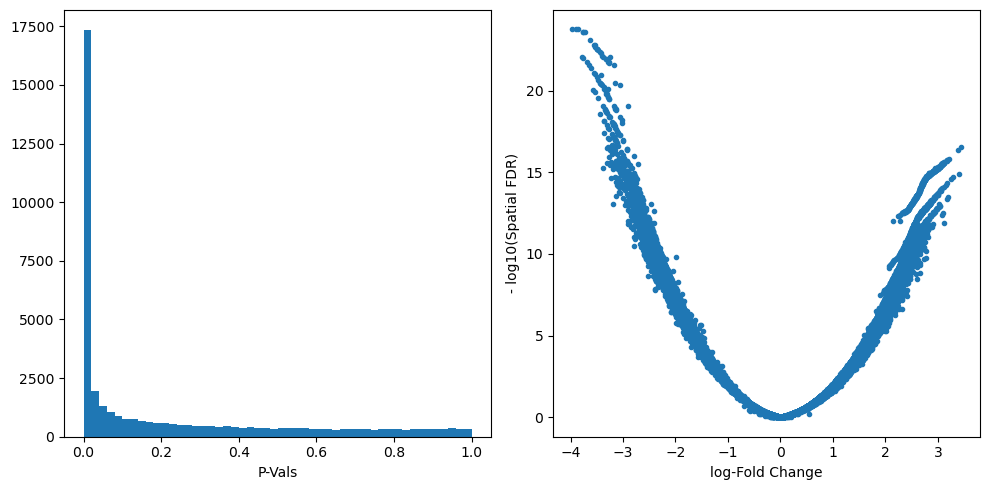

In [11]:
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,2,1)
plt.hist(adata.uns["nhood_adata"].obs.PValue, bins=50);
plt.xlabel("P-Vals");
plt.subplot(1,2,2)
plt.plot(adata.uns["nhood_adata"].obs.logFC, -np.log10(adata.uns["nhood_adata"].obs.SpatialFDR), '.');
plt.xlabel("log-Fold Change");
plt.ylabel("- log10(Spatial FDR)");
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize

In [12]:
milopy.utils.build_nhood_graph(adata)

In [13]:
nhood_adata = adata.uns["nhood_adata"].copy()
nhood_adata

AnnData object with n_obs × n_vars = 40806 × 166
    obs: 'index_cell', 'kth_distance', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'SpatialFDR', 'Nhood_size'
    var: 'condition_continuous', 'batch'
    uns: 'sample_col', 'nhood'
    obsm: 'X_milo_graph'
    obsp: 'nhood_connectivities'

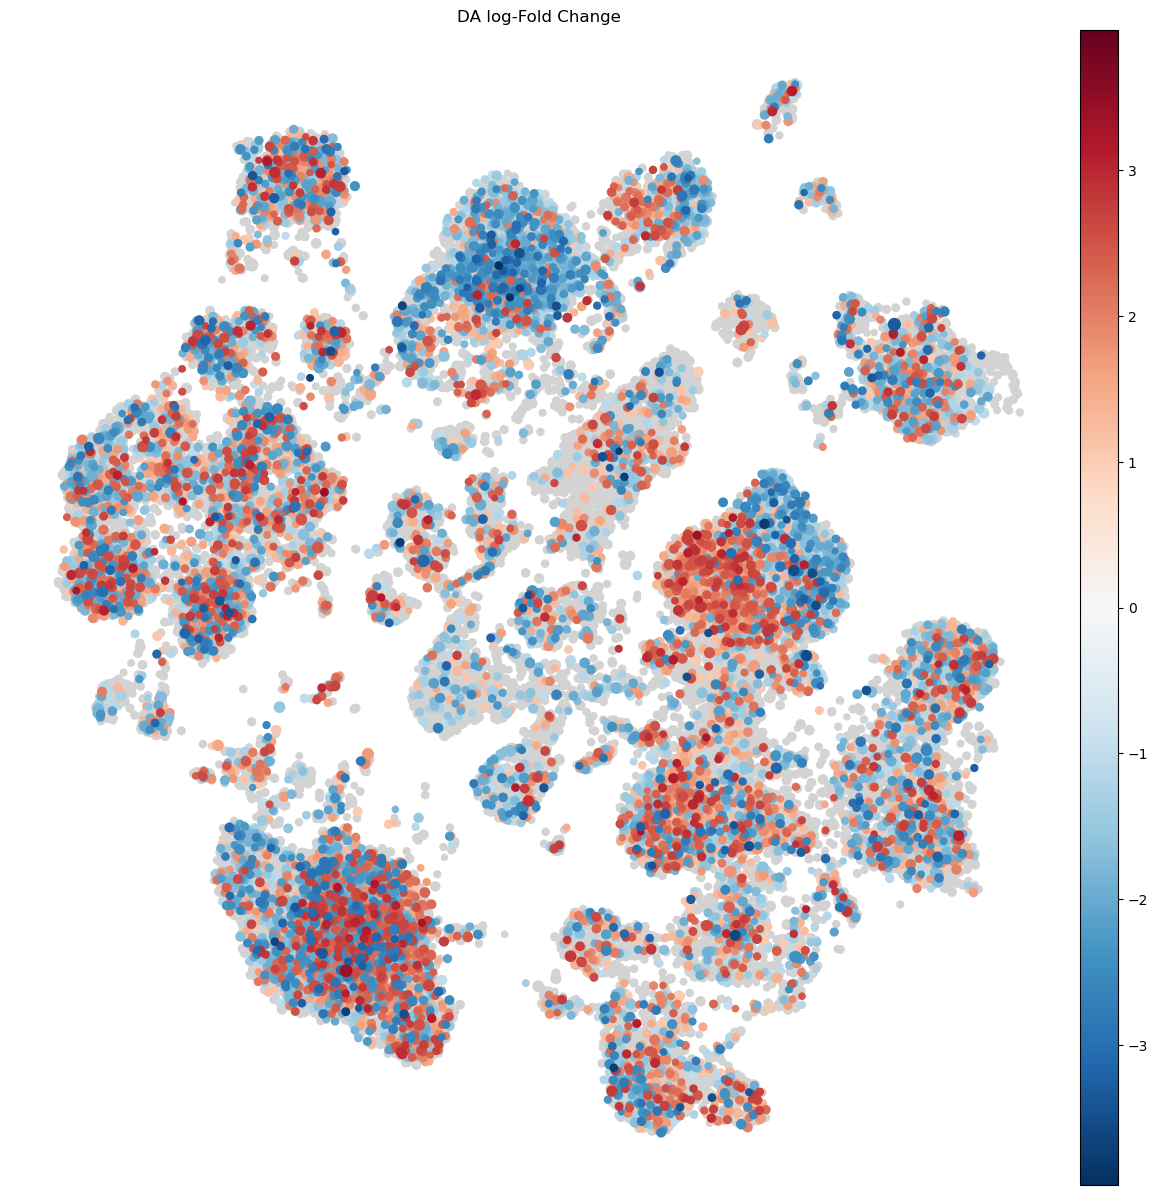

In [25]:
#import milopy.utils 
plt.rcParams["figure.figsize"] = [15,15]
milopl.plot_nhood_graph(adata[adata.obs.sample(adata.n_obs).index],
    alpha=0.01, ## SpatialFDR level (1%)
    min_size=2, ## Size of smallest dot 
    save= True)
                        #"/home/icb/lea.hollenberg/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/milo/milo_results.png"  )
#plt.savefig("/home/icb/lea.hollenberg/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/milo/milo_results.png")


## Visualize result by celltype

In [26]:
milopy.utils.annotate_nhoods(adata, anno_col=cell_type_identifier)

ValueError: Must pass 2-d input. shape=()

In [ ]:
plt.hist(adata.uns['nhood_adata'].obs["nhood_annotation_frac"]);
plt.xlabel("celltype fraction")

In [ ]:
adata.uns['nhood_adata'].obs.loc[adata.uns['nhood_adata'].obs["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Mixed"

In [ ]:
sc.pl.violin(adata.uns['nhood_adata'], "logFC", groupby="nhood_annotation", rotation=90, show=False);
plt.axhline(y=0, color='black', linestyle='--');
plt.show()